# Redes Neuronales Artificiales en un problema de Fuga de Clientes
----------------------------------------------------------------------------------------------------------------------------
### Por Eduardo Lozas

## 1. Invocar Dependencias
Para comenzar cualquier proyecto de análisis de datos y aprendizaje automático, primero necesitamos importar las bibliotecas necesarias. Estas bibliotecas proporcionan las herramientas esenciales para el manejo de datos, visualización, procesamiento y modelado.

In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##### --- Descripción de las Bibliotecas:

- **NumPy**: Proporciona soporte para arrays y matrices grandes y multidimensionales, junto con una colección de funciones matemáticas para operar en estas estructuras.

- **Pandas**: Ofrece estructuras de datos y herramientas para la manipulación y análisis efectivo de datos. Es ideal para trabajar con datos tabulares como son los DataFrames.

- **Matplotlib y Seaborn**: Son bibliotecas de visualización de datos en Python. Matplotlib permite la creación de gráficos estáticos, animados e interactivos. Seaborn, basado en Matplotlib, proporciona una interfaz de alto nivel para la elaboración de gráficos estadísticos atractivos e informativos.

- **Scikit-Learn (sklearn)**: Una herramienta simple y eficiente para el análisis de datos y el modelado estadístico. Incluye soporte para diversas técnicas de preprocesamiento y división de datos.

- **TensorFlow y Keras**: TensorFlow es una plataforma integral de código abierto para el aprendizaje automático. Keras, integrado en TensorFlow, proporciona una API de alto nivel para construir y entrenar modelos de aprendizaje profundo de forma sencilla.

## 2. Cargar los Datos
Cargamos los datos desde el archivo CSV utilizando Pandas. Esta biblioteca facilita la lectura de datos y su manipulación inicial.

In [522]:
df = pd.read_csv('Churn_Modelling.csv')

##### --- Resumen

- **df.head()**: Muestra las primeras filas del DataFrame, lo que proporciona una vista rápida de los datos, incluyendo los nombres de las columnas y los primeros valores.
- **df.info()**: Proporciona un resumen conciso del DataFrame, incluyendo el número total de entradas, la existencia de valores nulos y los tipos de datos de cada columna.

## 3. Análisis Exploratorio Básico
Realizamos un análisis exploratorio básico para comprender la estructura de los datos. Esto incluye revisar las primeras filas de datos, entender las estadísticas descriptivas y visualizar la distribución de algunas variables clave.

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

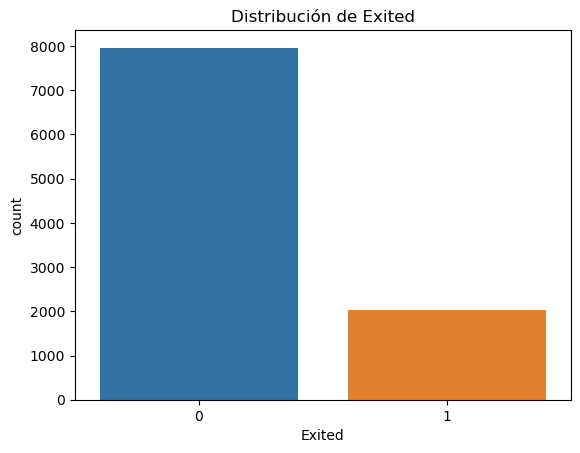

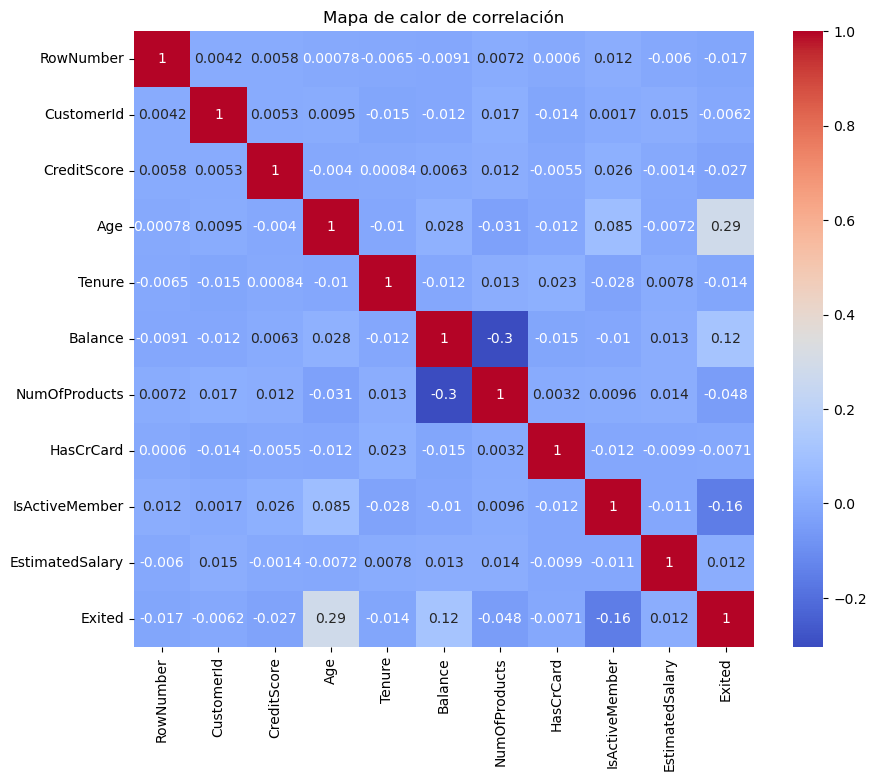

In [523]:
# Revisar las primeras filas
print(df.head())

# Estadísticas descriptivas
print(df.describe())

# Visualizaciones
# Distribución de la variable objetivo
sns.countplot(x='Exited', data=df)
plt.title('Distribución de Exited')
plt.show()

# Correlación entre características
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

## 4. Análisis Exploratorio Avanzado
En esta etapa, profundizamos en el análisis exploratorio, utilizando gráficos más complejos y buscando insights adicionales. Esto puede incluir la exploración de relaciones entre múltiples variables y el análisis de subgrupos.

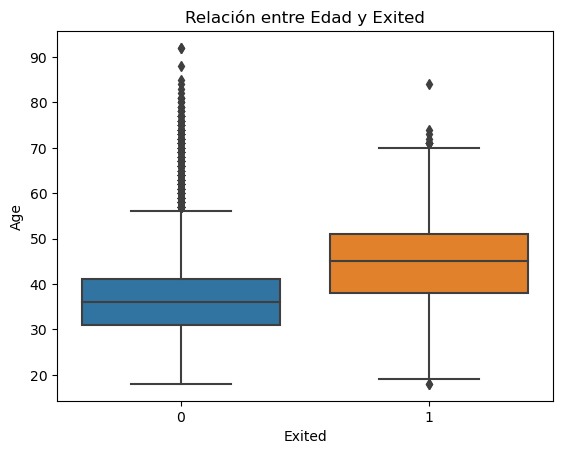

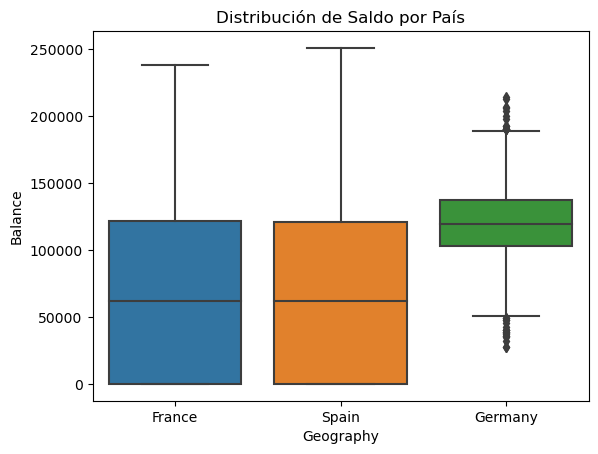

In [524]:
# Análisis de relaciones
# Relación entre edad y salida del banco
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Relación entre Edad y Exited')
plt.show()

# Análisis de subgrupos
# Distribución de saldo por país
sns.boxplot(x='Geography', y='Balance', data=df)
plt.title('Distribución de Saldo por País')
plt.show()

## 5. Preprocesamiento de Datos
El preprocesamiento de datos es crucial para preparar los datos para el modelado. Incluye la codificación de variables categóricas y el escalado de características numéricas. Esto asegura que el modelo reciba los datos en un formato adecuado y comparable.

In [525]:
# Codificación de variables categóricas
encoder = OneHotEncoder()
categorical_columns = ['Geography', 'Gender']
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]).toarray())

# Escalado de características numéricas
scaler = StandardScaler()
numeric_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Combinar datos codificados y escalados
df = df.drop(columns=categorical_columns)
df = pd.concat([df, df_encoded], axis=1)

## 6. División de Datos en Conjuntos de Entrenamiento y Prueba
Dividimos los datos en un conjunto de entrenamiento y otro de prueba. Esto nos permite entrenar nuestro modelo en un conjunto de datos y luego probar su rendimiento en un conjunto separado que no ha visto antes.

In [526]:
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Construir un Modelo de RNA Simple Utilizando Keras
Construimos un modelo de Red Neuronal Artificial (RNA) simple utilizando Keras. Este será un modelo básico con pocas capas para establecer una línea base.

In [527]:
X_train = X_train.drop(columns='Surname')

In [528]:
# Reconstruir el modelo con la forma de entrada correcta
model_simple = Sequential()
model_simple.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))  # Asegurándose de que la entrada coincida con el número de características
model_simple.add(Dense(1, activation='sigmoid'))

model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 8. Construir un Modelo de RNA Más Complejo Utilizando Keras
Ahora, construimos un modelo de RNA más complejo con más capas y neuronas. Esto puede ayudar a capturar relaciones más complejas en los datos.

In [529]:
model_complex = Sequential()
model_complex.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model_complex.add(Dense(10, activation='relu'))
model_complex.add(Dense(1, activation='sigmoid'))

model_complex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 9. Entrenar el Modelo y Reportar Métricas de Rendimiento
Entrenamos ambos modelos con los datos de entrenamiento y reportamos las métricas de rendimiento como la precisión y la pérdida.

In [530]:
X_train = X_train.values.astype('float32')

In [531]:
print("Tipo de datos en X_train después de la conversión:", X_train.dtype)

Tipo de datos en X_train después de la conversión: float32


In [532]:
history_simple = model_simple.fit(X_train, y_train, epochs=1994, batch_size=4, validation_split=0.16)

Epoch 1/1994


1680/1680 [==============================] - 9s 5ms/step - loss: 19906.4258 - accuracy: 0.6765 - val_loss: 18338.6309 - val_accuracy: 0.7953
Epoch 2/1994
1680/1680 [==============================] - 7s 4ms/step - loss: 8353.1240 - accuracy: 0.6686 - val_loss: 3071.0571 - val_accuracy: 0.7953
Epoch 3/1994
1680/1680 [==============================] - 4s 3ms/step - loss: 8713.4150 - accuracy: 0.6707 - val_loss: 12663.8887 - val_accuracy: 0.7953
Epoch 4/1994
1680/1680 [==============================] - 6s 3ms/step - loss: 7800.5625 - accuracy: 0.6760 - val_loss: 847.8492 - val_accuracy: 0.7953
Epoch 5/1994
1680/1680 [==============================] - 10s 6ms/step - loss: 7379.2803 - accuracy: 0.6826 - val_loss: 4549.8994 - val_accuracy: 0.7953
Epoch 6/1994
1680/1680 [==============================] - 10s 6ms/step - loss: 6904.4912 - accuracy: 0.6692 - val_loss: 8070.5337 - val_accuracy: 0.7953
Epoch 7/1994
1680/1680 [==============================] - 4s 2ms/step - loss: 8175.8896 - accurac

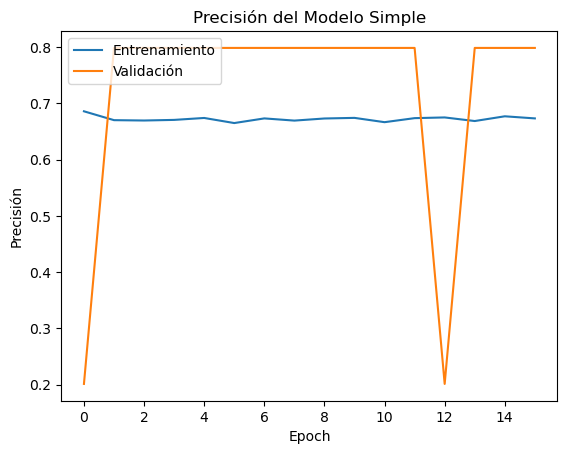

In [ ]:
# Métricas de rendimiento
plt.plot(history_simple.history['accuracy'])
plt.plot(history_simple.history['val_accuracy'])
plt.title('Precisión del Modelo Simple')
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

## 10. Evaluar el Modelo con los Datos de Prueba y Reportar Métricas de Rendimiento
Finalmente, evaluamos el rendimiento de ambos modelos utilizando el conjunto de datos de prueba. Esto nos da una idea de cómo el modelo se desempeñará con datos nuevos y no vistos.

In [ ]:
# Eliminar la columna 'Surname' si aún no se ha hecho
X_test = X_test.drop(columns='Surname')

# Convertir X_test a un array de NumPy de tipo float32
X_test = X_test.values.astype('float32')

# Convertir y_test a float32 si es necesario
y_test = y_test.astype('float32')

In [ ]:
# Evaluación del modelo simple
test_loss, test_accuracy = model_simple.evaluate(X_test, y_test)
print(f'Precisión en datos de prueba: {test_accuracy}')

# Repetir para el modelo complejo

63/63 [==============================] - 0s 3ms/step - loss: 1373.5819 - accuracy: 0.8035
Precisión en datos de prueba: 0.8034999966621399


## 11. Fundamentos de las Redes Neuronales Artificiales (ANN)

Las **Redes Neuronales Artificiales (ANN)** son una pieza central del aprendizaje profundo, inspiradas en las redes neuronales biológicas de cerebros animales. A continuación se detalla su funcionamiento y estructura.

### Estructura Básica

Una ANN típica consta de nodos (neuronas) organizados en capas: una **capa de entrada**, varias **capas ocultas** y una **capa de salida**. Cada neurona en una capa está conectada a todas las neuronas de la capa siguiente, formando una red densamente conectada.

```
Capa de Entrada -> Capas Ocultas -> Capa de Salida
```

### Neurona Artificial

La unidad básica de una ANN es la **neurona artificial**. Funciona recibiendo entradas, procesándolas y generando una salida. Matemáticamente, esto se representa como:

```
f(x) = Activación(∑(w_i * x_i) + b)
```

Donde:
- `x_i` son las entradas
- `w_i` son los pesos
- `b` es el sesgo
- `Activación(·)` es la función de activación

### Funciones de Activación

Las funciones de activación introducen no linealidades en el modelo, permitiendo a la red aprender tareas complejas. Algunas funciones de activación comunes incluyen:

- **ReLU (Rectified Linear Unit)**: `f(x) = max(0, x)`
- **Sigmoide**: `f(x) = 1 / (1 + exp(-x))`
- **Tanh (Tangente Hiperbólica)**: `f(x) = tanh(x)`

### Propagación hacia Adelante

En la **propagación hacia adelante**, las entradas se pasan a través de la red, capa por capa, hasta generar una salida. Este proceso se repite para cada ejemplo en el conjunto de datos.

### Retropropagación y Aprendizaje

La **retropropagación** es un método para actualizar los pesos de la red. Utiliza el algoritmo de **descenso de gradiente** para minimizar una función de pérdida que mide la diferencia entre la salida predicha y la real.

- **Función de Pérdida**: Ejemplos incluyen la pérdida de entropía cruzada para clasificación y el error cuadrático medio para regresión.
- **Descenso de Gradiente**: Actualiza los pesos en la dirección que reduce la función de pérdida, usando un parámetro llamado tasa de aprendizaje.

### Regularización

Para evitar el sobreajuste, se emplean técnicas de regularización como la **regularización L1/L2** y el **abandono (Dropout)**.

- **Regularización L1/L2**: Añade un término de penalización a la función de pérdida basado en los pesos.
- **Dropout**: Durante el entrenamiento, algunas neuronas se "apagan" aleatoriamente, lo que ayuda a la red a generalizar mejor.

### Resumen

Las ANN son herramientas poderosas para modelar relaciones complejas en los datos. Su eficacia proviene de su estructura en capas, la capacidad de aprender representaciones no lineales y su flexibilidad para adaptarse a diferentes tipos de problemas de aprendizaje automático.

---